# Logistic regression Assignment
Problem-Statement(Bank_data)

Output variable -> y
y -> Whether the client has subscribed a term deposit or not
Binomial ("yes" or "no")

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [2]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df[df.duplicated()].shape

(0, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.info()
df1 = df.drop(df.columns[[1,2,3,4,6,7,8,10,15,16]],axis=1)
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X = ss.fit_transform(df1)

In [8]:
X=pd.DataFrame(X)

In [10]:
X

,0,1,2,3,4,5,6
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


In [11]:
X.columns=["age","balance","day","duration","campaign","pdays","previous"]

In [12]:
X

,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


In [13]:
df2=df.drop(df.columns[[0,5,9,11,12,13,14]],axis=1)
df2

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [14]:
#label encoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [15]:
for i in range(0,10):
       df2.iloc[:,i]=LE.fit_transform(df2.iloc[:,i])

<ipython-input-15-cff9ca01a933>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.iloc[:,i]=LE.fit_transform(df2.iloc[:,i])
<ipython-input-15-cff9ca01a933>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.iloc[:,i]=LE.fit_transform(df2.iloc[:,i])
<ipython-input-15-cff9ca01a933>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem

In [16]:
X

,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


In [18]:
df3=pd.concat([X,df2],axis=1)
df3

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,2,8,3,0
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,9,2,1,0,1,0,2,8,3,0
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,2,1,1,0,1,1,2,8,3,0
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,1,1,3,0,1,0,2,8,3,0
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,9,1,2,0,0,0,0,9,3,1
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,5,0,0,0,0,0,0,9,3,1
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,5,1,1,0,0,0,0,9,2,1
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,1,1,1,0,0,0,1,9,3,0


In [19]:
y=df3["y"]
x=df3.iloc[:,0:16]

In [20]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x,y)
y_proba = LR.predict_proba(x)[:,1]
df3["Y_proba"] = pd.DataFrame(y_proba)
df3

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y,Y_proba
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,2,8,3,0,0.033941
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,9,2,1,0,1,0,2,8,3,0,0.020490
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,2,1,1,0,1,1,2,8,3,0,0.005244
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,1,1,3,0,1,0,2,8,3,0,0.018940
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,11,2,3,0,0,0,2,8,3,0,0.089225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,9,1,2,0,0,0,0,9,3,1,0.814345
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,5,0,0,0,0,0,0,9,3,1,0.285180
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,5,1,1,0,0,0,0,9,2,1,0.927038
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,1,1,1,0,0,0,1,9,3,0,0.202344


In [21]:
def f1(x):
    if x <0.5:
        return 0
    else:
        return 1

In [22]:
df3["y_Predicted"] = df3["Y_proba"].apply(f1)
df3

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y,Y_proba,y_Predicted
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,2,8,3,0,0.033941,0
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,9,2,1,0,1,0,2,8,3,0,0.020490,0
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,2,1,1,0,1,1,2,8,3,0,0.005244,0
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,1,1,3,0,1,0,2,8,3,0,0.018940,0
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,11,2,3,0,0,0,2,8,3,0,0.089225,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,9,1,2,0,0,0,0,9,3,1,0.814345,1
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,5,0,0,0,0,0,0,9,3,1,0.285180,0
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,5,1,1,0,0,0,0,9,2,1,0.927038,1
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,1,1,1,0,0,0,1,9,3,0,0.202344,0


In [23]:
y_pred=df3["y_Predicted"]
print(y_pred)

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    0
45208    1
45209    0
45210    1
Name: y_Predicted, Length: 45211, dtype: int64


In [24]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
cm=confusion_matrix(y,y_pred)
cm

array([[39137,   785],
       [ 4145,  1144]])

In [26]:
ac=accuracy_score(y,y_pred)
print("Accuracy Score",ac.round(2))

Accuracy Score 0.89


In [27]:
rs=recall_score(y,y_pred)
print("Sensitivity Score",rs.round(2))

Sensitivity Score 0.22


In [28]:
ps=precision_score(y,y_pred)
print("precision Score",ps.round(2))

precision Score 0.59


In [29]:
TN=cm[0,0]
TN

39137

In [30]:
FN=cm[0,1]
FN

785

In [31]:
specificity=TN/(TN+FN)

In [32]:
print("Specificity Score Will be  ::: ",specificity.round(2))

Specificity Score Will be  :::  0.98


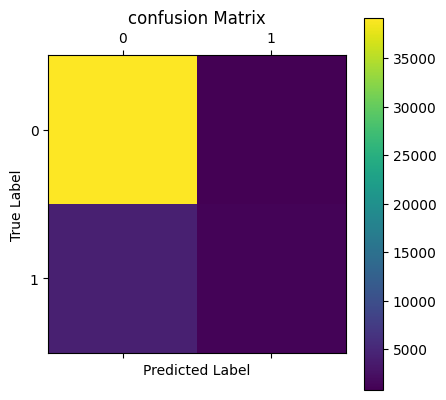

In [33]:
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.title("confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

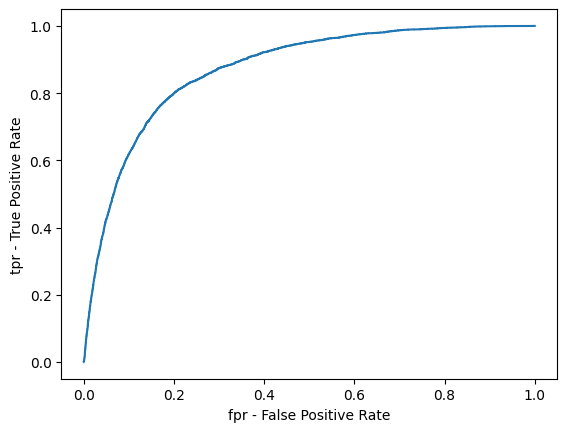

0.872

In [34]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, _   = roc_curve(y,y_proba)

plt.plot(fpr,tpr)
plt.ylabel('tpr - True Positive Rate')
plt.xlabel('fpr - False Positive Rate')
plt.show()
# area under curve
auc = roc_auc_score(y, y_proba)
auc.round(3)